# <font color='#8B0000'>**📊 01_GERMAN_CREDIT**</font>



---
---

# <font color='lightgreen'>✅ Configuracion inicial</font>




El análisis de riesgo crediticio es un proceso que las instituciones financieras realizan para evaluar la probabilidad de que un cliente cumpla con sus compromisos financieros. Se examinan factores como historial crediticio, ingresos, capacidad de pago, estabilidad laboral, garantías, condiciones económicas y puntuación crediticia. La información obtenida ayuda a determinar si es seguro otorgar crédito, en qué condiciones y a qué tasas. El objetivo es equilibrar la mitigación de riesgos con la facilitación del acceso al crédito.

## <font color='orange'>🟠 Librerias </font>


In [79]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler

## <font color='orange'>🟠 Versiones de Librerias </font>


In [2]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'
print('------')
!pip show seaborn | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1
------
Name: seaborn
Version: 0.12.2


## <font color='orange'>🟠 Conexion a Drive </font>


In [3]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta de tu librería al path de Python
import sys
sys.path.append('/content/drive/MyDrive/')

# Importar la librería
from eda import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <font color='orange'>🟠 Maximo de Columnas y Filas </font>




In [4]:
# Mostrar todas las columnas y filas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

# <font color='lightgreen'>✅ EDA German Credit</font>


## <font color='orange'>🟠 Importamos el Dataset </font>

In [5]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSg10d36k6W8_PBsp5jHEMBbna53JlMpagBUSxJNstnGt0bhk_Ys-h6LYqPc2F2MrekCawfGxEHd1bZ/pub?output=csv'
df = pd.read_csv(url)

## <font color='orange'>🟠 Renombramos las columnas </font>

In [6]:
df.columns = ['categoria_cliente', 'estado_cuenta', 'duracion_meses', 'historial_crediticio', 'proposito',
              'monto_credito', 'cuenta_ahorros', 'empleo_actual', 'tasa_cuota', 'estado_sexual',
              'otros_garantes', 'residencia_actual', 'propiedad', 'edad', 'otros_planes_cuotas',
              'vivienda', 'creditos_banco_actual', 'trabajo', 'personas_mantenimiento', 'telefono',
              'trabajador_extranjero']

In [7]:
df_aleatorios = df.sample(n=10, random_state=42)
df_aleatorios

,categoria_cliente,estado_cuenta,duracion_meses,historial_crediticio,proposito,monto_credito,cuenta_ahorros,empleo_actual,tasa_cuota,estado_sexual,otros_garantes,residencia_actual,propiedad,edad,otros_planes_cuotas,vivienda,creditos_banco_actual,trabajo,personas_mantenimiento,telefono,trabajador_extranjero
521,1,< 0 DM,18,existing credits paid back duly till now,domestic appliances,3190,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,24,none,own,1,skilled employee / official,1,none,yes
737,0,< 0 DM,18,existing credits paid back duly till now,car (new),4380,100 <= ... < 500 DM,1 <= ... < 4 years,3,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",35,none,own,1,unskilled - resident,2,"yes, registered under the customers name",yes
740,0,< 0 DM,24,all credits at this bank paid back duly,car (new),2325,100 <= ... < 500 DM,4 <= ... < 7 years,2,male : single,none,3,"if not A121/A122 : car or other, not in attrib...",32,bank,own,1,skilled employee / official,1,none,yes
660,0,>= 200 DM / salary assignments for at least 1 ...,12,existing credits paid back duly till now,domestic appliances,1297,... < 100 DM,1 <= ... < 4 years,3,male : married/widowed,none,4,real estate,23,none,rent,1,skilled employee / official,1,none,yes
411,0,no checking account,33,critical account/ other credits existing (not ...,car (used),7253,... < 100 DM,4 <= ... < 7 years,3,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",35,none,own,2,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
678,0,< 0 DM,24,existing credits paid back duly till now,domestic appliances,2384,... < 100 DM,.. >= 7 years,4,male : single,none,4,real estate,64,bank,rent,1,unskilled - resident,1,none,yes
626,0,>= 200 DM / salary assignments for at least 1 ...,6,existing credits paid back duly till now,radio/television,2116,... < 100 DM,1 <= ... < 4 years,2,male : single,none,2,real estate,41,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
513,0,0 <= ... < 200 DM,12,delay in paying off in the past,domestic appliances,585,... < 100 DM,1 <= ... < 4 years,4,male : married/widowed,co-applicant,4,real estate,20,none,rent,2,skilled employee / official,1,none,yes
859,0,no checking account,9,existing credits paid back duly till now,car (new),3577,100 <= ... < 500 DM,1 <= ... < 4 years,1,male : single,guarantor,2,real estate,26,none,rent,1,skilled employee / official,2,none,no
136,0,no checking account,27,delay in paying off in the past,car (used),8613,.. >= 1000 DM,1 <= ... < 4 years,2,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",27,none,own,2,skilled employee / official,1,none,yes


## <font color='#800080'>🟣 Separamos las variables Numericas y Categoricas</font>





In [8]:
# Separar columnas categóricas y numéricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
columnas_numericas = df.select_dtypes(exclude=['object']).columns
columnas_numericas = columnas_numericas[1:]

## <font color='#800080'>🟣 Configuramos el Estilo de Graficos</font>

In [9]:
# Configurar el estilo de Seaborn y Matplotlib
sns.set_style("whitegrid")  # Estilos
sns.set_palette("vlag")  # Paleta de colores
plt.rc('font', size=8)  # Tamaño de la fuente global
plt.rcParams['axes.labelsize'] = 10  # Tamaño de la etiqueta de los ejes
plt.rcParams['xtick.labelsize'] = 9  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 9  # Tamaño de las etiquetas del eje y

In [10]:
def generar_graficos(x_axis1, x_axis2):
    # Tamaño de la figura (ancho x largo)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Grafico 1
    sns.countplot(x=x_axis1, data=df, hue='categoria_cliente', ax=axs[0])
    axs[0].set_title(f'grafico de {x_axis1}', fontweight='bold')
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=15, ha='right')  # Alineación a la derecha

    # Grafico 2
    sns.countplot(x=x_axis2, data=df, hue='categoria_cliente', ax=axs[1])
    axs[1].set_title(f'Grafico de {x_axis2}', fontweight='bold')
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=15, ha='right')  # Alineación a la derecha

    # Separación horizontal
    plt.tight_layout(pad=5)

    plt.show()

In [11]:
def generar_graficos2(x_axis1, x_axis2):
    # Tamaño de la figura (ancho x largo)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Grafico 1
    histplot1 = sns.histplot(data=df, x=x_axis1, hue="categoria_cliente", element="step", common_norm=False, ax=axs[0])
    axs[0].set_title(f'Grafico de {x_axis1}', fontweight='bold')
    axs[0].set_xticks(histplot1.get_xticks())  # Ubicaciones de ticks
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=15, ha='right')  # Ajustar la alineación a la derecha

    # Grafico 2
    histplot2 = sns.histplot(data=df, x=x_axis2, hue="categoria_cliente", element="step", common_norm=False, ax=axs[1])
    axs[1].set_title(f'Grafico de {x_axis2}', fontweight='bold')
    axs[1].set_xticks(histplot2.get_xticks())  # Ubicaciones de ticks
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=15, ha='right')  # Alineación a la derecha

    # Separación horizontal
    plt.tight_layout(pad=5)

    plt.show()

## <font color='#DAA520'>🟡 Graficos Columnas Categoricos</font>


In [12]:
columnas_categoricas

Index(['estado_cuenta', 'historial_crediticio', 'proposito', 'cuenta_ahorros',
       'empleo_actual', 'estado_sexual', 'otros_garantes', 'propiedad',
       'otros_planes_cuotas', 'vivienda', 'trabajo', 'telefono',
       'trabajador_extranjero'],
      dtype='object')

----------


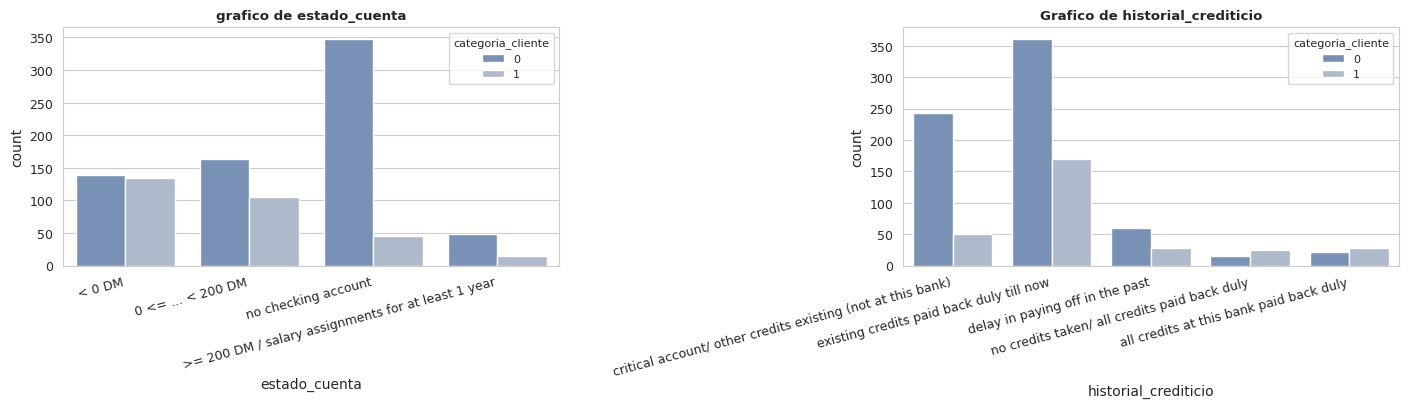

----------


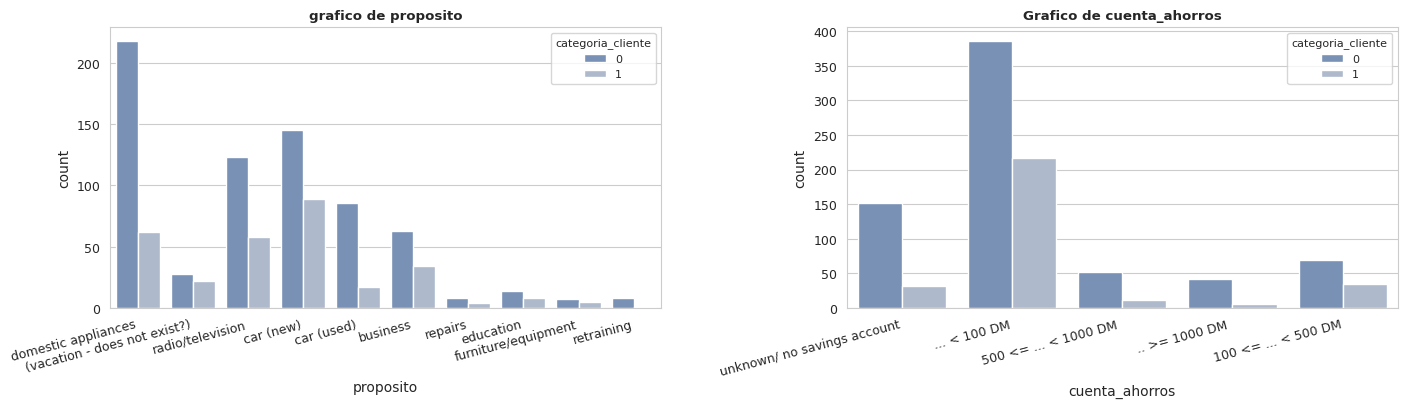

----------


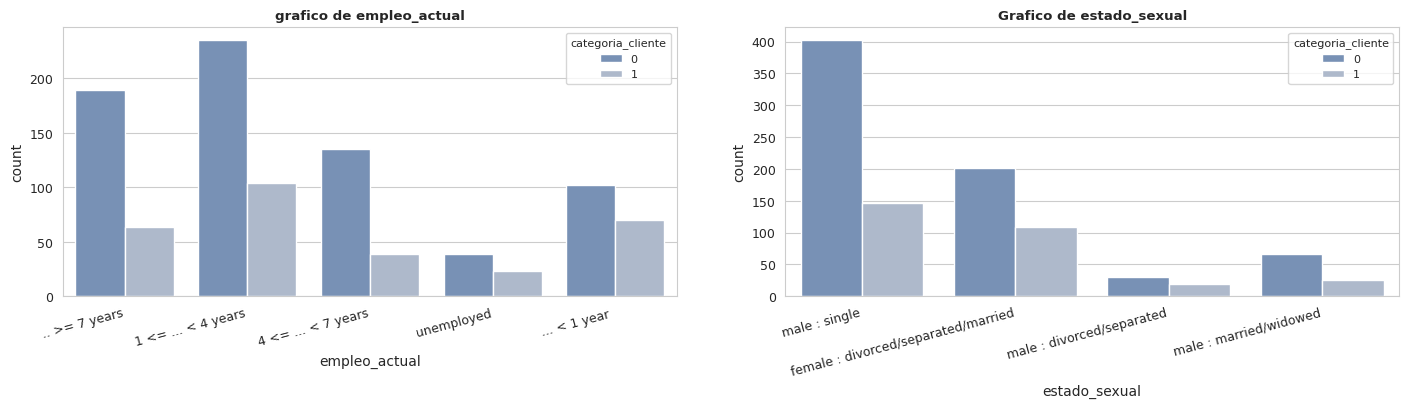

----------


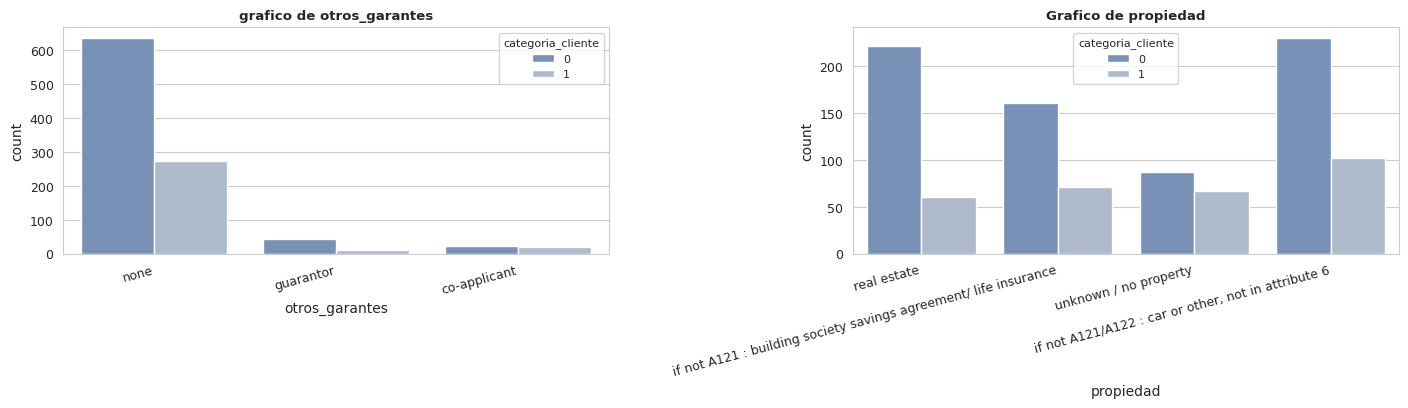

----------


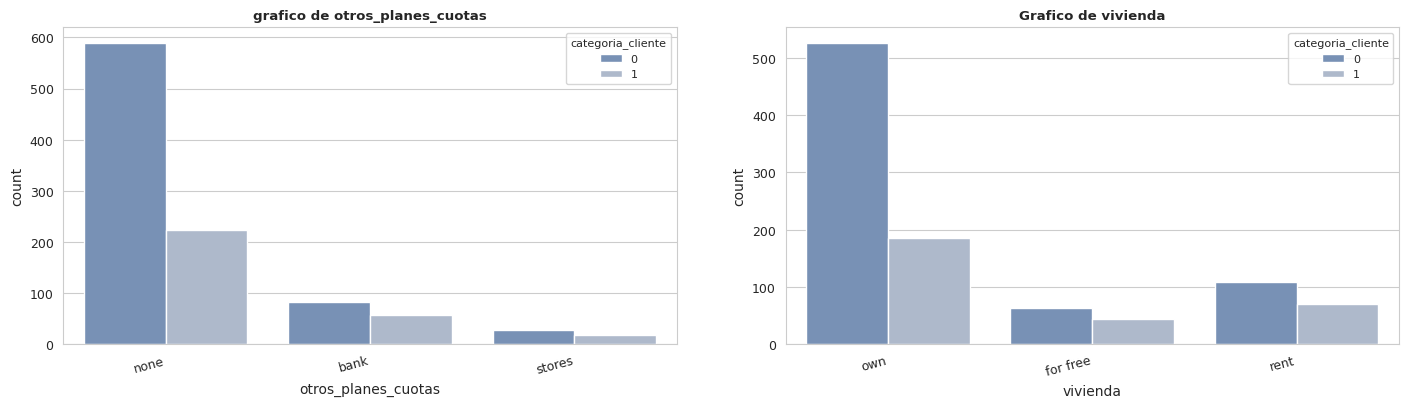

----------


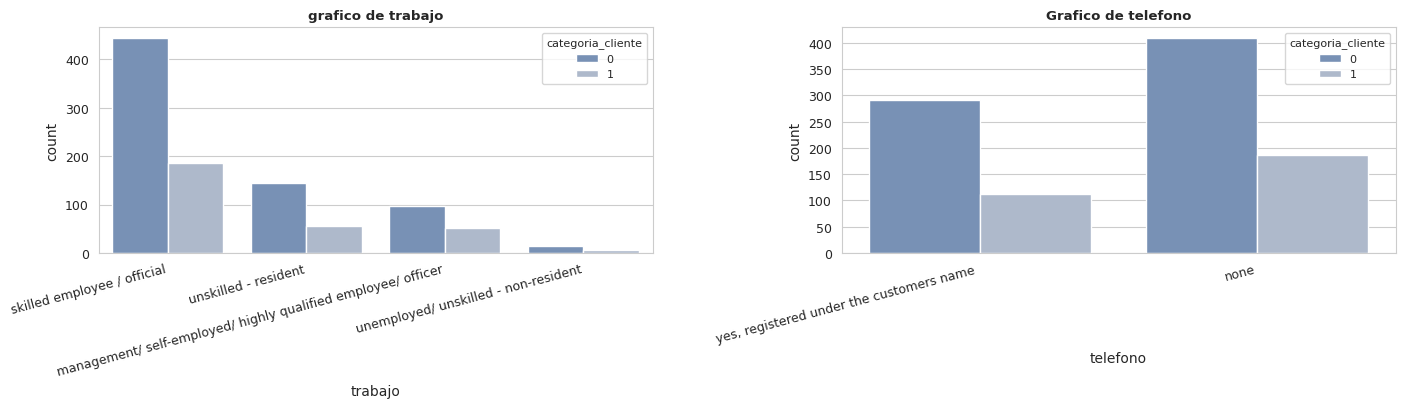

----------


In [13]:
for i in range(0, len(columnas_categoricas), 2):
    print("-"*10)
    # Verificar si hay una columna disponible después de la actual
    if i + 1 < len(columnas_categoricas):
        generar_graficos(columnas_categoricas[i], columnas_categoricas[i + 1])


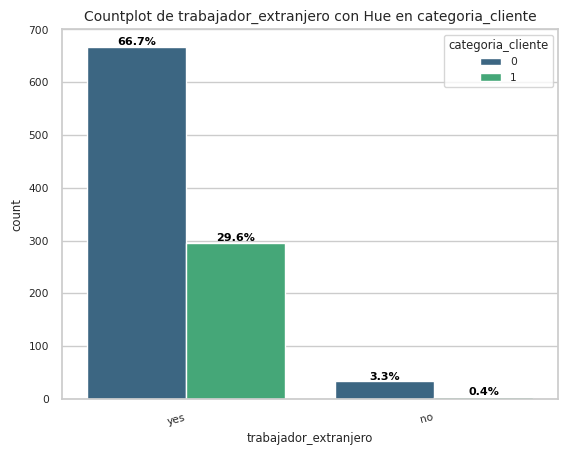

In [14]:
countplot_subplot(x="trabajador_extranjero", data=df, hue='categoria_cliente', rotation=15)
plt.show()

## <font color='#DAA520'>🟡 Graficos Columnas Numericas</font>

In [15]:
columnas_numericas

Index(['duracion_meses', 'monto_credito', 'tasa_cuota', 'residencia_actual',
       'edad', 'creditos_banco_actual', 'personas_mantenimiento'],
      dtype='object')

In [16]:
df.edad.max()

75

----------


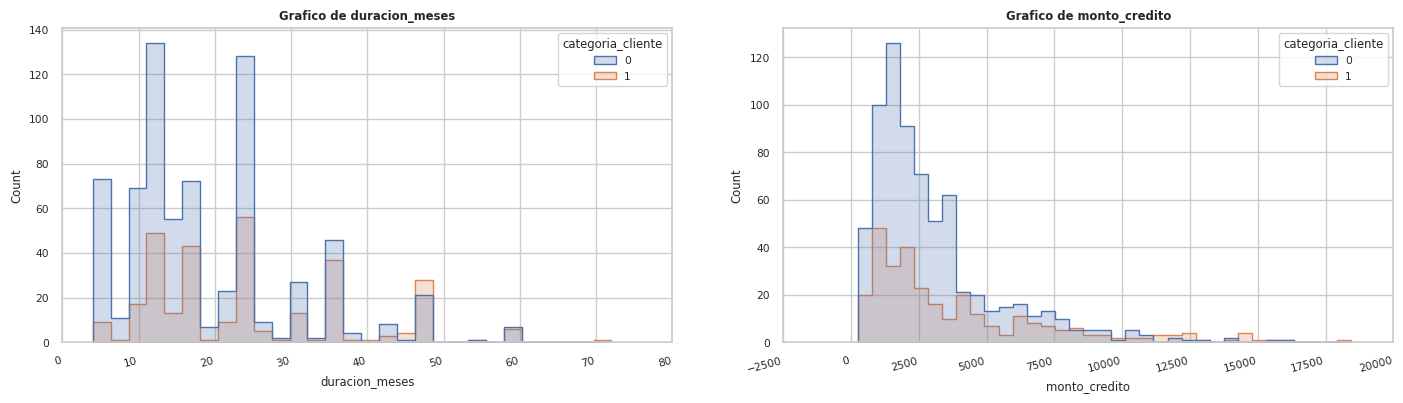

----------


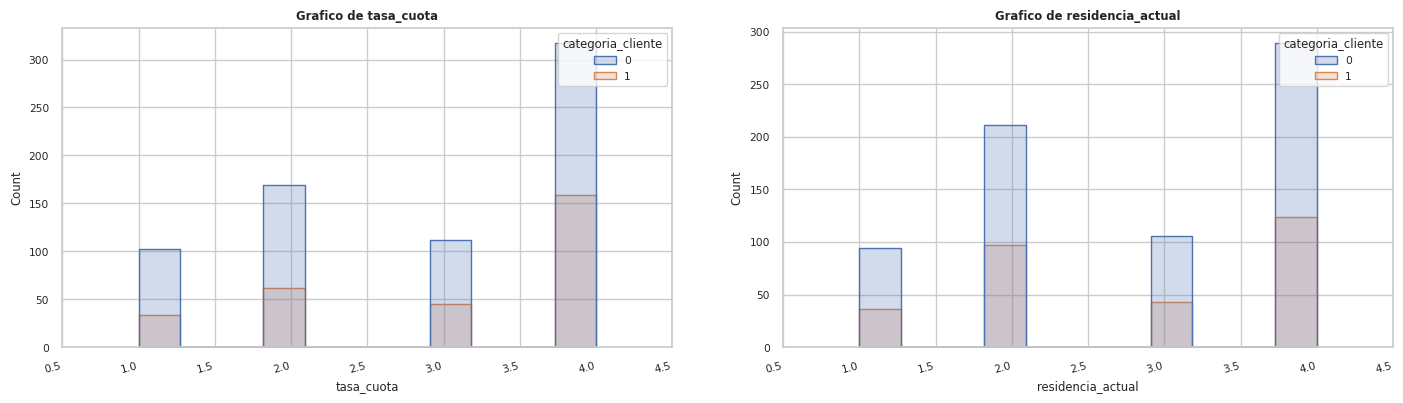

----------


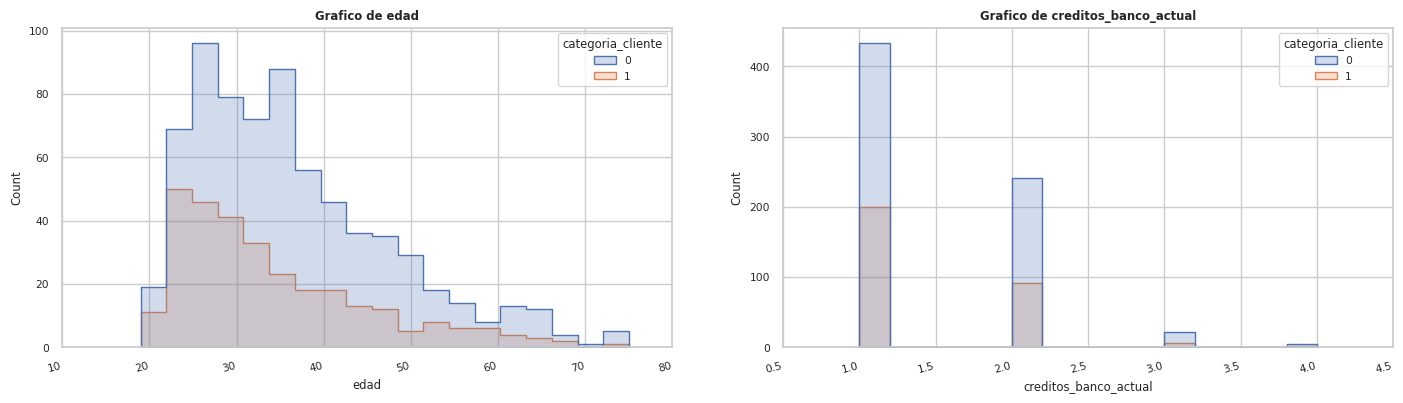

----------


In [17]:
for i in range(0, len(columnas_numericas), 2):
    print("-"*10)
    # Verificar si hay una columna disponible después de la actual
    if i + 1 < len(columnas_numericas):
        generar_graficos2(columnas_numericas[i], columnas_numericas[i + 1])

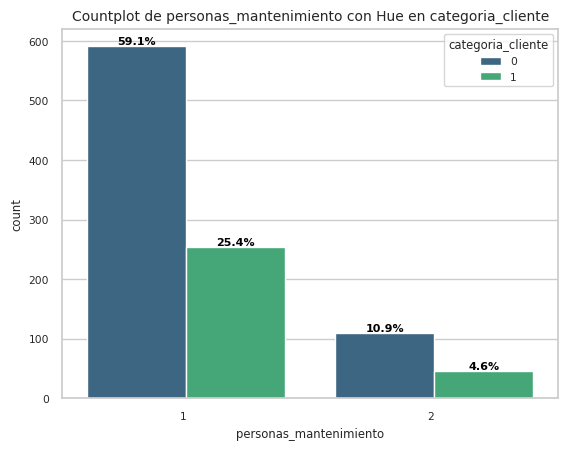

In [18]:
countplot_subplot(x="personas_mantenimiento", data=df, hue='categoria_cliente', rotation=0)
plt.show()

## <font color='orange'>🟠 Escalamos las Columnas Numericas </font>

In [19]:
# Columnas a escalar
columnas_a_escalar = columnas_numericas

# Inicializar MinMaxScaler
scaler = MinMaxScaler()

# Escalar las columnas seleccionadas y reemplazar los valores en el DataFrame
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

df.head(2)

,categoria_cliente,estado_cuenta,duracion_meses,historial_crediticio,proposito,monto_credito,cuenta_ahorros,empleo_actual,tasa_cuota,estado_sexual,otros_garantes,residencia_actual,propiedad,edad,otros_planes_cuotas,vivienda,creditos_banco_actual,trabajo,personas_mantenimiento,telefono,trabajador_extranjero
0,0,< 0 DM,0.029412,critical account/ other credits existing (not ...,domestic appliances,0.050567,unknown/ no savings account,.. >= 7 years,1.000000,male : single,none,1.000000,real estate,0.857143,none,own,0.333333,skilled employee / official,0.0,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,0.647059,existing credits paid back duly till now,domestic appliances,0.313690,... < 100 DM,1 <= ... < 4 years,0.333333,female : divorced/separated/married,none,0.333333,real estate,0.053571,none,own,0.000000,skilled employee / official,0.0,none,yes


## <font color='#DAA520'>🟡 Violinplot Columnas Numericas</font>

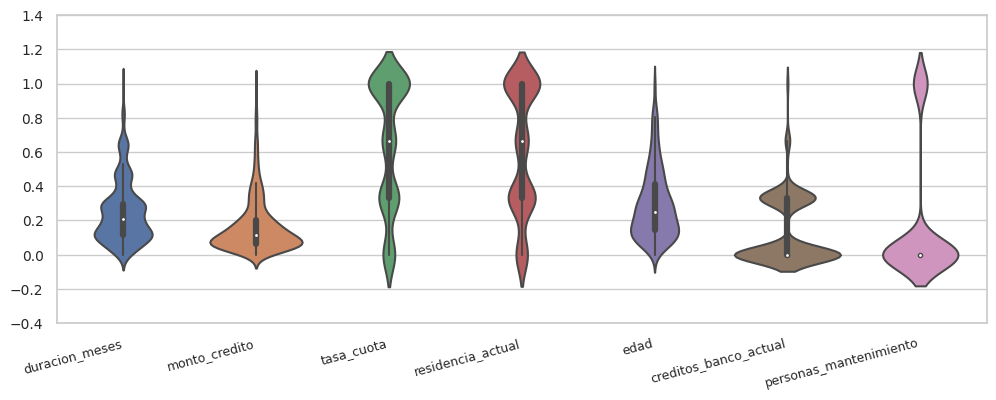

In [34]:
violinplot(df=df.loc[:, columnas_numericas])

## <font color='#DAA520'>🟡 Mapa de calor Correlacion</font>

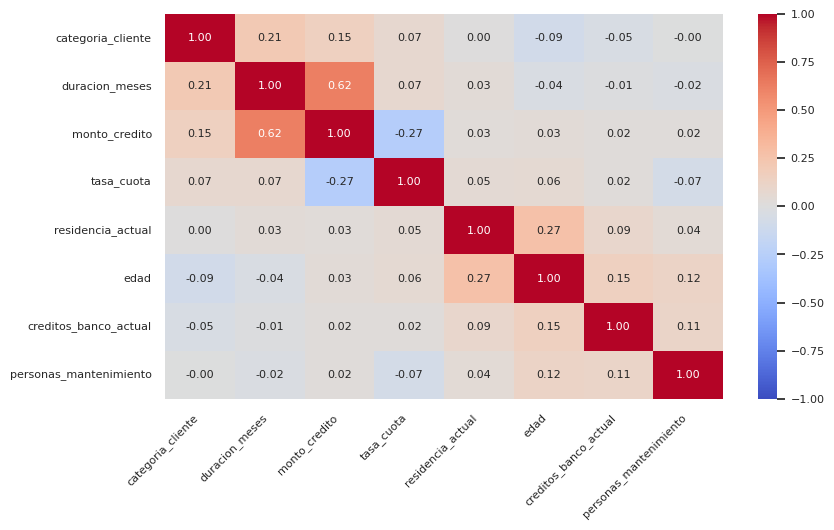

In [21]:
plot_correlation(correlation_matrix=df.corr(numeric_only=True))

## <font color='#DAA520'>🟡 Similitud entre Filas y Columnas</font>

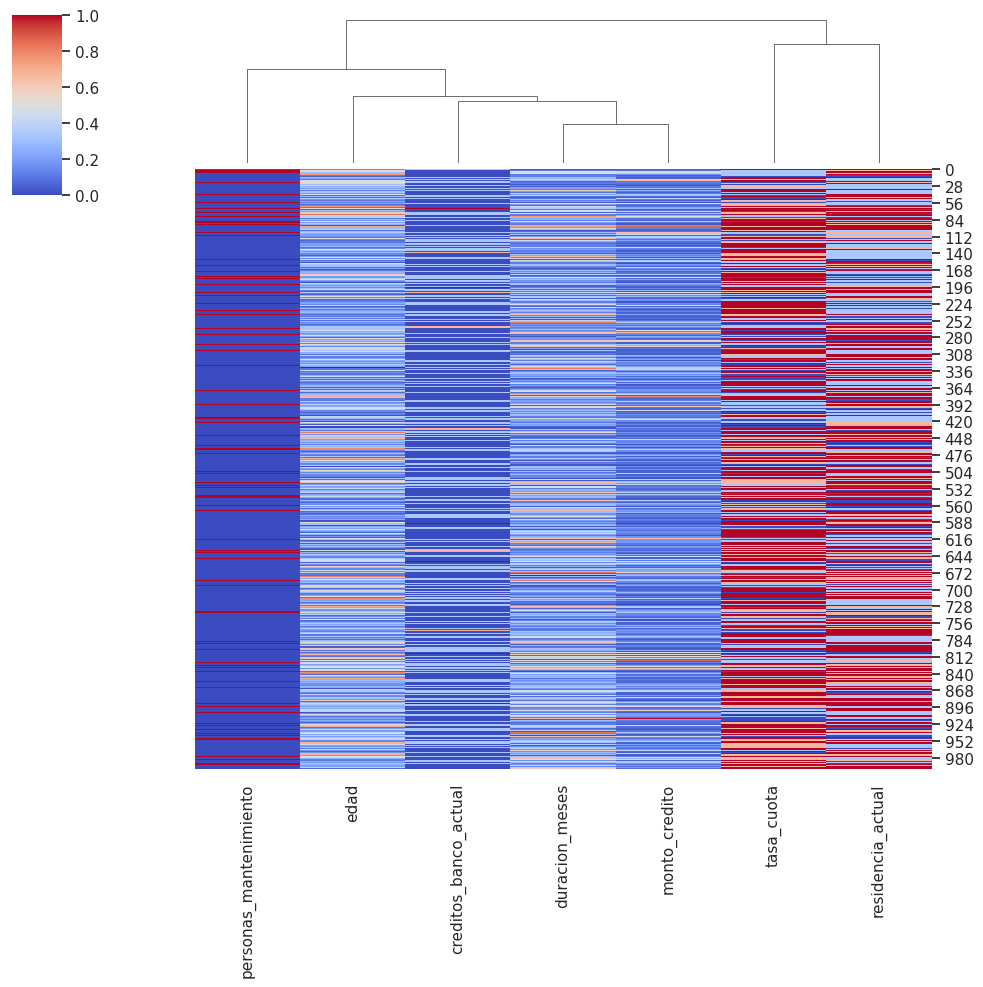

In [22]:
clustermap(df=df.loc[:, columnas_numericas])

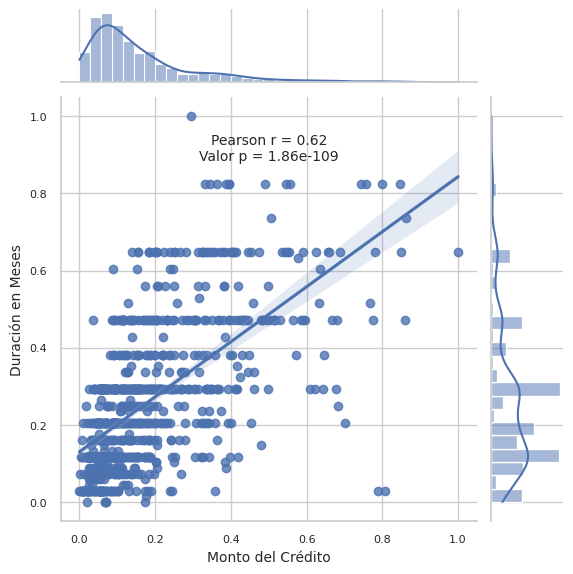

In [29]:
# Gráfico conjunto (joint plot) con regresión
r1 = sns.jointplot(x="monto_credito", y="duracion_meses", data=df, kind="reg", height=6)

# Coeficiente de correlación de Pearson y el valor p
r, p = stats.pearsonr(df["monto_credito"], df["duracion_meses"])

# Gráfico con el coeficiente de correlación
r1.ax_joint.annotate(f'Pearson r = {r:.2f}\nValor p = {p:.2e}', xy=(0.5, 0.85), xycoords='axes fraction', ha='center', fontsize=10)

# Tamaño de fuente de las etiquetas de los ejes x e y
r1.set_axis_labels("Monto del Crédito", "Duración en Meses", fontsize=10)

# Tamaño de fuente de las marcas en los ejes x e y
r1.ax_joint.tick_params(axis='x', labelsize=8)
r1.ax_joint.tick_params(axis='y', labelsize=8)

plt.show()

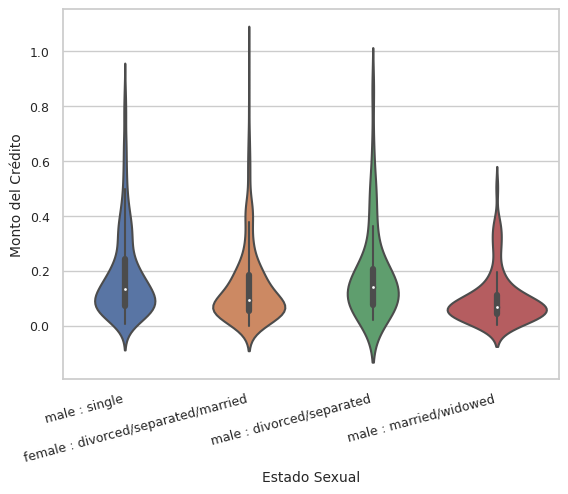

In [39]:
# Violín con diferenciación por estado sexual
sns.violinplot(x="estado_sexual", y="monto_credito", data=df)

# Ajustar el tamaño de fuente de las etiquetas de los ejes x e y
plt.xlabel("Estado Sexual", fontsize=10)
plt.ylabel("Monto del Crédito", fontsize=10)

# Rotar el eje x
plt.xticks(rotation=15, ha='right')  # 'ha' significa horizontal alignment

# Tamaño de fuente de las marcas en los ejes x e y
plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=9)

plt.show()


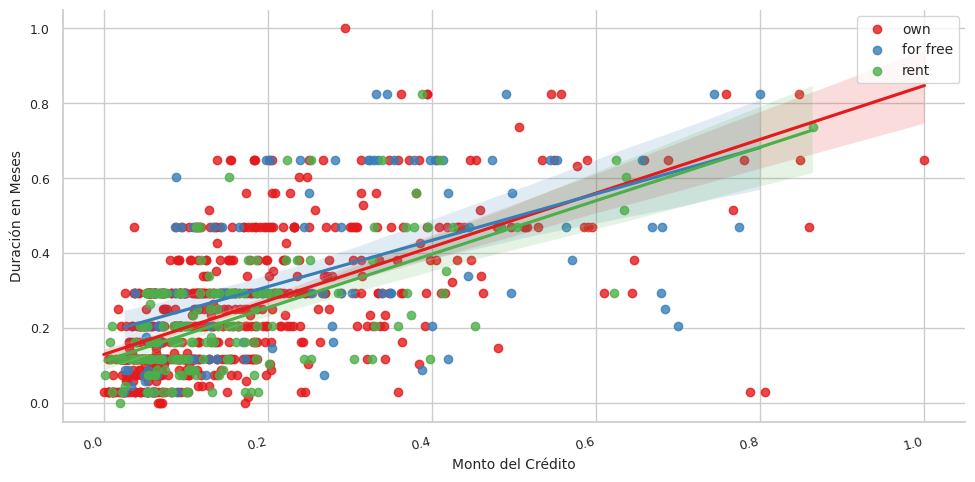

In [63]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Gráfico de dispersión con regresión y diferenciación por vivienda
sns.lmplot(x="monto_credito", y="duracion_meses", hue="vivienda", data=df, palette="Set1", height=5, aspect=2, legend=False)

# Tamaño de fuente de las etiquetas de los ejes x e y
plt.xlabel("Monto del Crédito", fontsize=10)
plt.ylabel("Duración en Meses", fontsize=10)

# Rotar el eje x
plt.xticks(rotation=15, ha='right', fontsize=10)  # 'ha' significa horizontal alignment

# Tamaño de fuente de las marcas en los ejes x e y
plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=9)

# Tamaño de la leyenda
plt.legend(fontsize=10)

plt.show()

In [65]:
columnas_categoricas

columnas_numericas


Index(['duracion_meses', 'monto_credito', 'tasa_cuota', 'residencia_actual',
       'edad', 'creditos_banco_actual', 'personas_mantenimiento'],
      dtype='object')

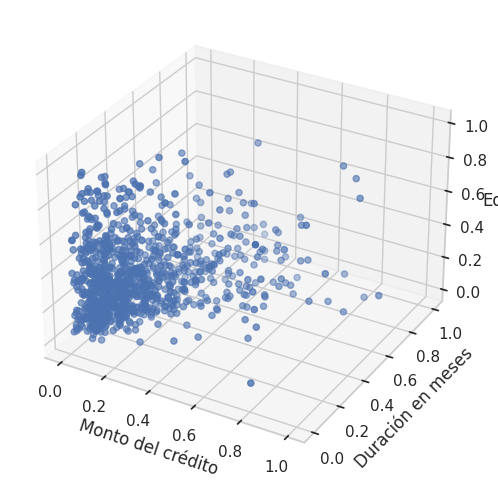

In [78]:
# Figura y un eje 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersión tridimensional
ax.scatter(df["monto_credito"], df["duracion_meses"], df["edad"])

# Etiquetas de los ejes
ax.set_xlabel("Monto del crédito")
ax.set_ylabel("Duración en meses")
ax.set_zlabel("Edad")

plt.show()